**IBM HR Analytics Employee Attrition & Performance**
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset>

---






Import de paquetes y librerías necesarias

In [2]:
import pandas as pd
# import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import itertools
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Carga de datos

In [4]:
# df = pd.read_csv('/content/drive/My Drive/personal/TEAM 2/IBM-HR.csv')
df = pd.read_csv("data/IBM-HR.csv")

### Descripción del dataset

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [7]:
columns_list = df.columns.values.tolist()
for column in columns_list:
    print(column)
    print(df[column].unique())
    print('\n')

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Attrition
['Yes' 'No']


BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  96

In [8]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], inplace=True, axis=1)

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

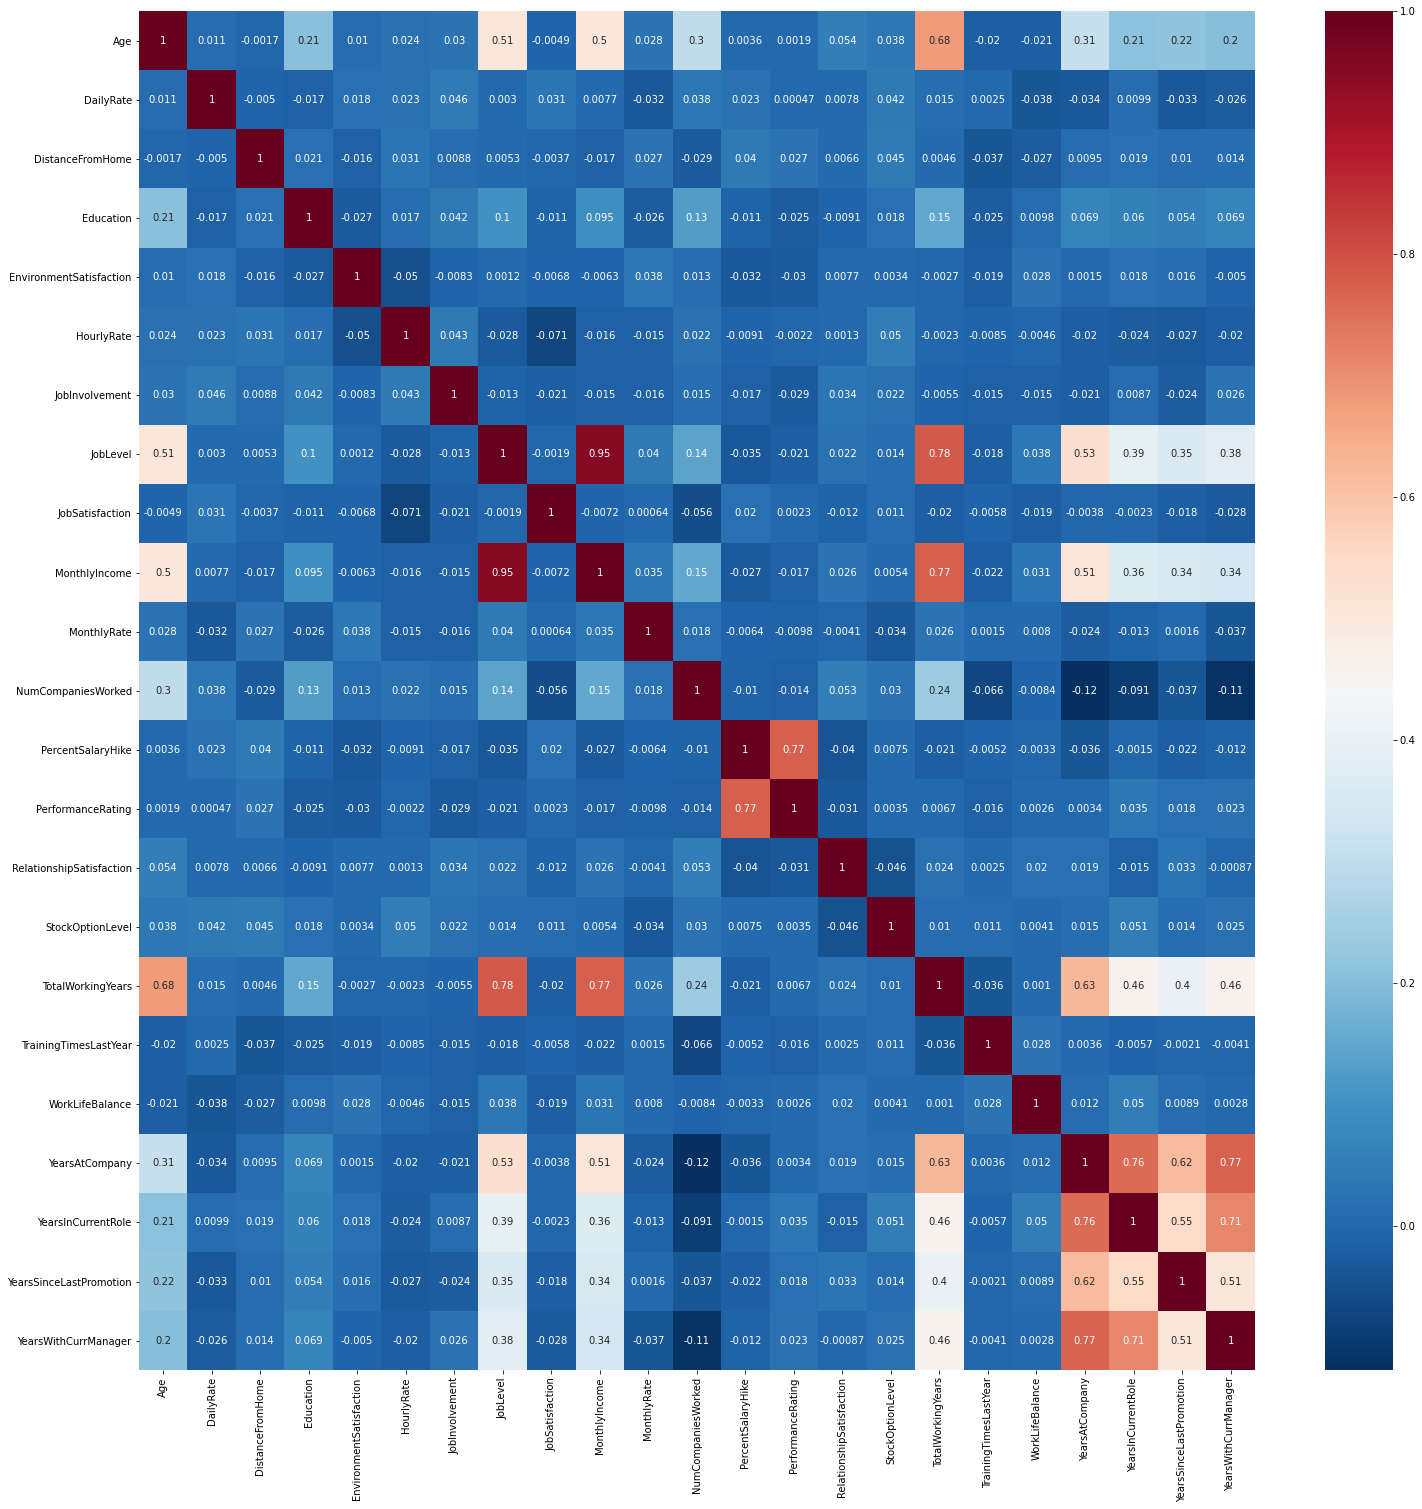

In [10]:
corrMatrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrMatrix, annot=True, cmap="RdBu_r")
plt.show()

In [11]:
corrMatrix

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [12]:
indices = np.where(corrMatrix > 0.2)
indices = [(corrMatrix.index[x], corrMatrix.columns[y]) for x, y in zip(*indices) if x != y and x < y]

In [13]:
indices

[('Age', 'Education'),
 ('Age', 'JobLevel'),
 ('Age', 'MonthlyIncome'),
 ('Age', 'NumCompaniesWorked'),
 ('Age', 'TotalWorkingYears'),
 ('Age', 'YearsAtCompany'),
 ('Age', 'YearsInCurrentRole'),
 ('Age', 'YearsSinceLastPromotion'),
 ('Age', 'YearsWithCurrManager'),
 ('JobLevel', 'MonthlyIncome'),
 ('JobLevel', 'TotalWorkingYears'),
 ('JobLevel', 'YearsAtCompany'),
 ('JobLevel', 'YearsInCurrentRole'),
 ('JobLevel', 'YearsSinceLastPromotion'),
 ('JobLevel', 'YearsWithCurrManager'),
 ('MonthlyIncome', 'TotalWorkingYears'),
 ('MonthlyIncome', 'YearsAtCompany'),
 ('MonthlyIncome', 'YearsInCurrentRole'),
 ('MonthlyIncome', 'YearsSinceLastPromotion'),
 ('MonthlyIncome', 'YearsWithCurrManager'),
 ('NumCompaniesWorked', 'TotalWorkingYears'),
 ('PercentSalaryHike', 'PerformanceRating'),
 ('TotalWorkingYears', 'YearsAtCompany'),
 ('TotalWorkingYears', 'YearsInCurrentRole'),
 ('TotalWorkingYears', 'YearsSinceLastPromotion'),
 ('TotalWorkingYears', 'YearsWithCurrManager'),
 ('YearsAtCompany', 'Year

In [14]:
type(indices[0][0])

str

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Education'>

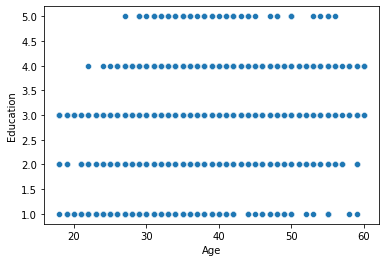

In [15]:
sns.scatterplot(df[indices[0][0]], df[indices[0][1]])

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='Age'>

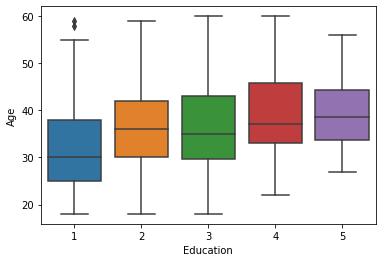

In [16]:
sns.boxplot(df[indices[0][1]], df[indices[0][0]])

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


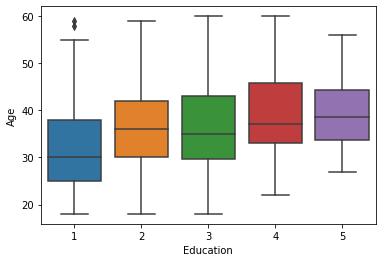

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


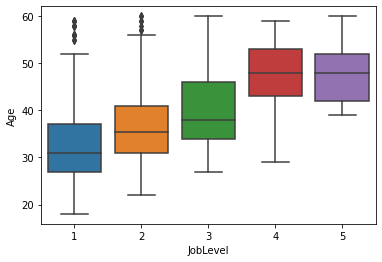

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


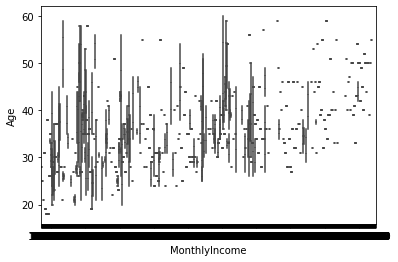

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


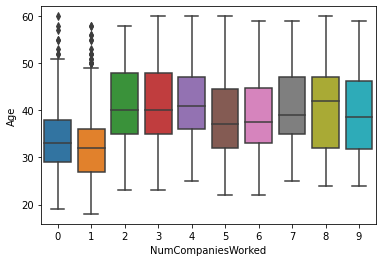

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


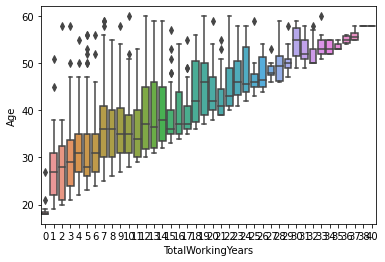

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


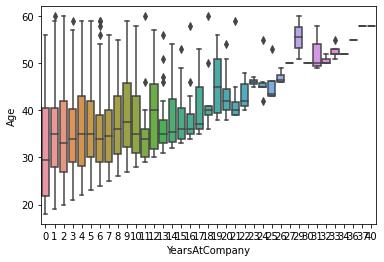

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


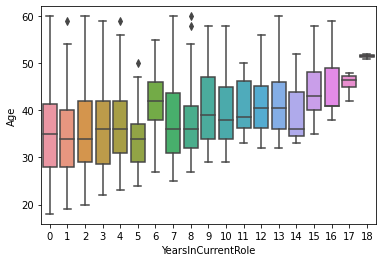

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


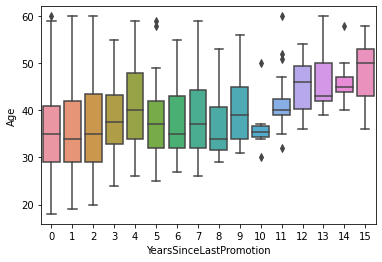

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


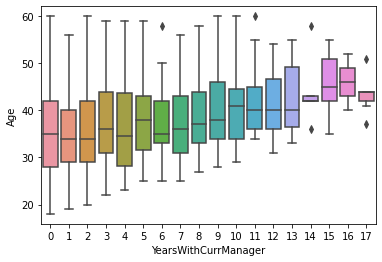

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


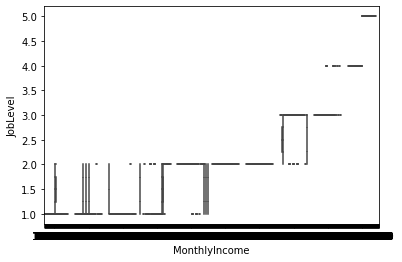

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


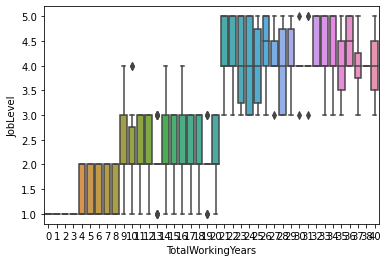

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


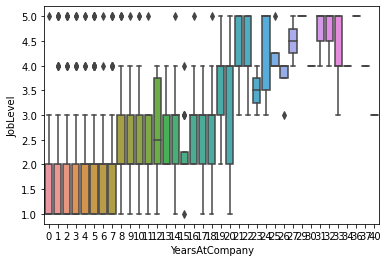

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


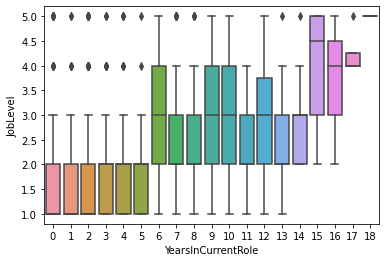

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


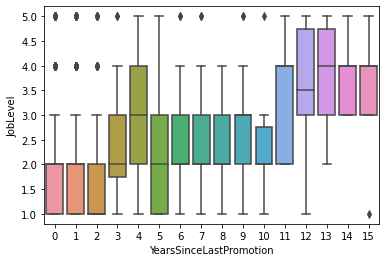

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


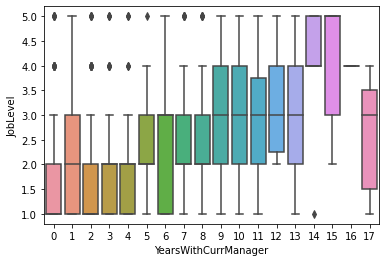

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


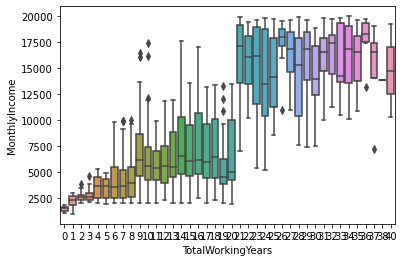

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


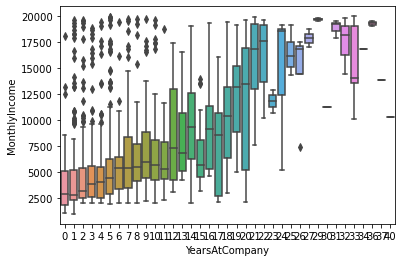

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


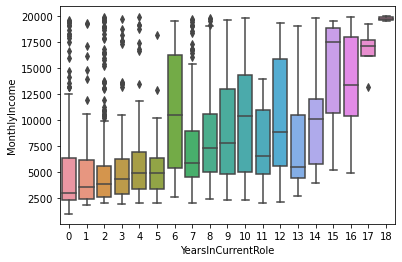

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


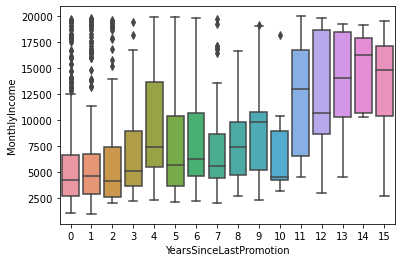

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


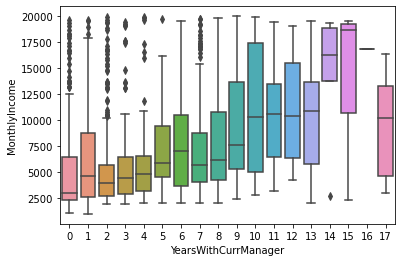

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


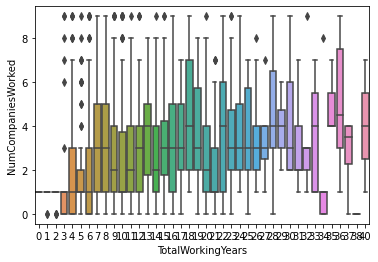

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


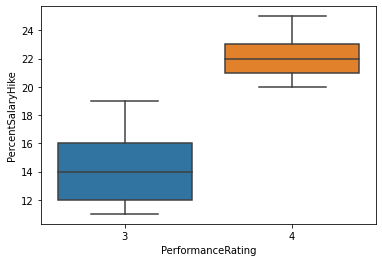

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


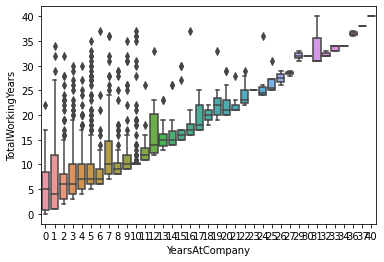

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


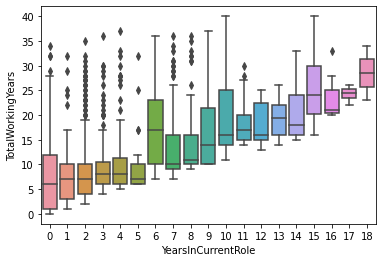

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


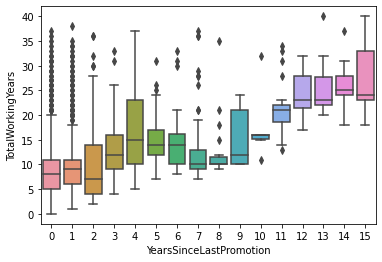

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


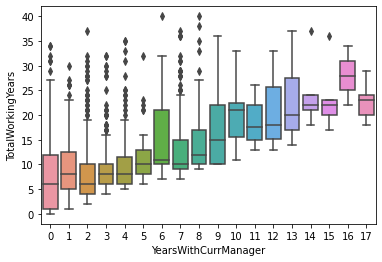

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


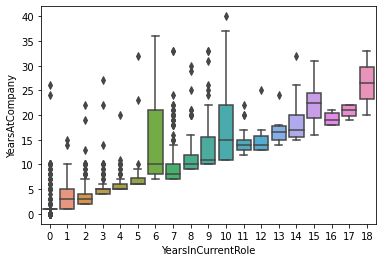

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


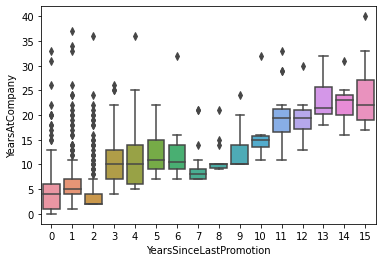

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


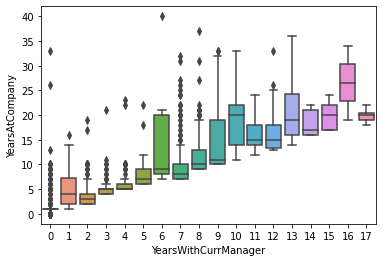

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


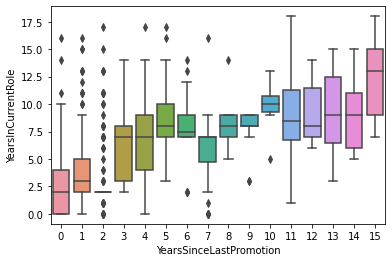

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


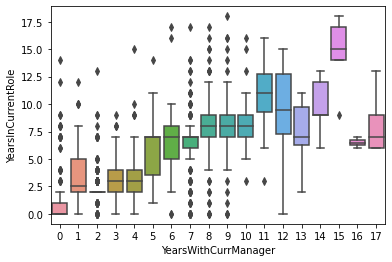

In [17]:
for i in range(len(indices) - 1):
    sns.boxplot(df[indices[i][1]], df[indices[i][0]])
    plt.show()

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

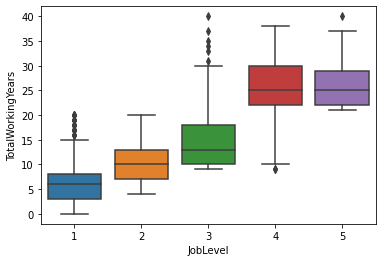

In [18]:
sns.boxplot(df['JobLevel'], df['TotalWorkingYears'])

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

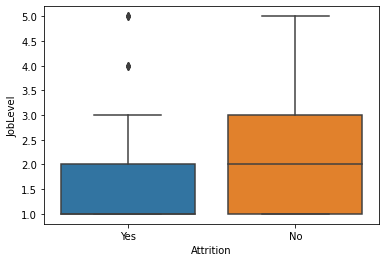

In [19]:
sns.boxplot(df['Attrition'], df['JobLevel'])

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

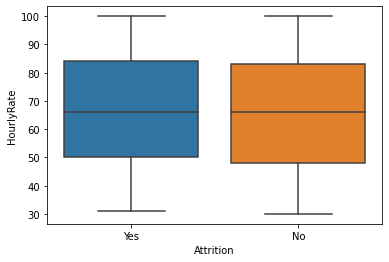

In [20]:
sns.boxplot(df['Attrition'], df['HourlyRate'])

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

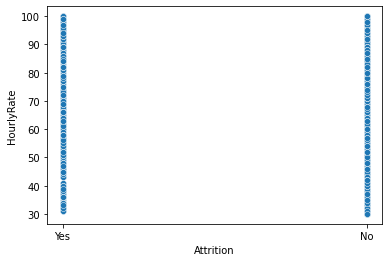

In [21]:
sns.scatterplot(df['Attrition'], df['HourlyRate'])

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

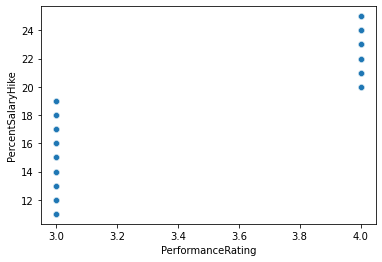

In [22]:
sns.scatterplot(df['PerformanceRating'], df['PercentSalaryHike'])

## Agrupando según años en la empresa y attrition

In [23]:
sorted_df = df.sort_values(by=['YearsAtCompany'], ascending=True)

In [24]:
years_att = sorted_df.groupby(['YearsAtCompany','Attrition'])

In [25]:
sorted_df.groupby(['YearsAtCompany','Attrition']).agg('count')

Age  BusinessTravel  DailyRate  Department  \
YearsAtCompany Attrition                                               
0              No          28              28         28          28   
               Yes         16              16         16          16   
1              No         112             112        112         112   
               Yes         59              59         59          59   
2              No         100             100        100         100   
...                       ...             ...        ...         ...   
33             Yes          1               1          1           1   
34             No           1               1          1           1   
36             No           2               2          2           2   
37             No           1               1          1           1   
40             Yes          1               1          1           1   

                          DistanceFromHome  Education  EducationField  \
YearsAtCompany Attrition                                                
0              No                       28         28              28   
               Yes                      16         16              16   
1              No                      112        112             112   
               Yes                      59         59              59   
2              No                      100        100             100   
...                                    ...        ...             ...   
33             Yes                       1          1               1   
34             No                        1          1               1   
36             No                        2          2               2   
37             No                        1          1               1   
40             Yes                       1          1               1   

                          EnvironmentSatisfaction  Gender  HourlyRate  ...  \
YearsAtCompany Attrition                                               ...   
0              No                              28      28          28  ...   
               Yes                             16      16          16  ...   
1              No                             112     112         112  ...   
               Yes                             59      59          59  ...   
2              No                             100     100         100  ...   
...                                           ...     ...         ...  ...   
33             Yes                              1       1           1  ...   
34             No                               1       1           1  ...   
36             No                               2       2           2  ...   
37             No                               1       1           1  ...   
40             Yes                              1       1           1  ...   

                          PercentSalaryHike  PerformanceRating  \
YearsAtCompany Attrition                                         
0              No                        28                 28   
               Yes                       16                 16   
1              No                       112                112   
               Yes                       59                 59   
2              No                       100                100   
...                                     ...                ...   
33             Yes                        1                  1   
34             No                         1                  1   
36             No                         2                  2   
37             No                         1                  1   
40             Yes                        1                  1   

                          RelationshipSatisfaction  StockOptionLevel  \
YearsAtCompany Attrition                                               
0              No                               28                28   
               Yes                              1

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Attrition'>

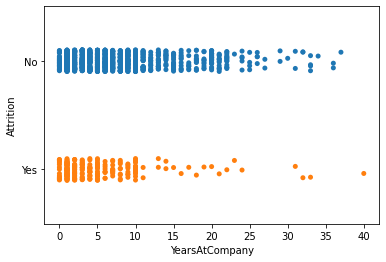

In [26]:
sns.stripplot(x="YearsAtCompany", y = 'Attrition', data=sorted_df)

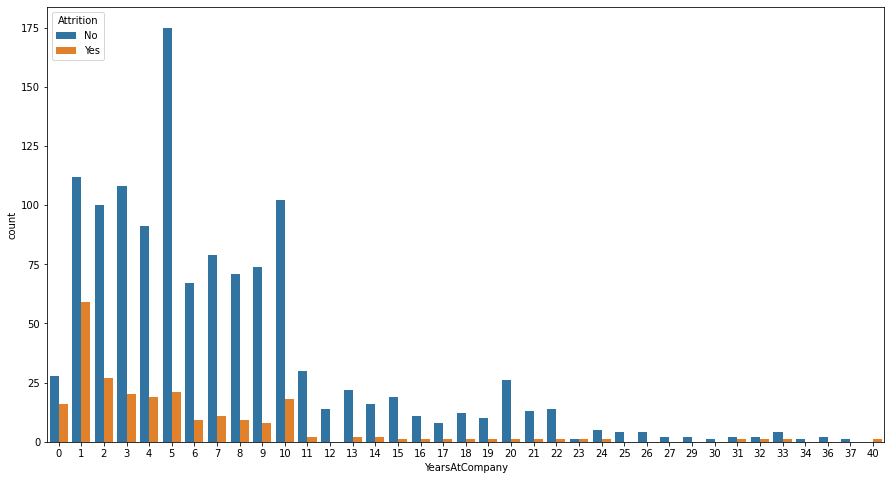

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x="YearsAtCompany", hue='Attrition', data=sorted_df)
plt.show()

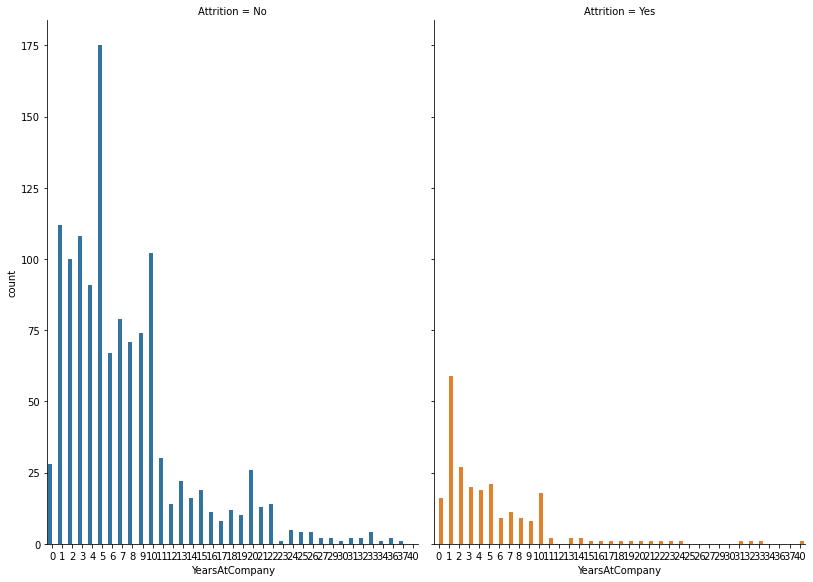

In [28]:
#plt.figure(figsize=(100,50))
sns.catplot(x="YearsAtCompany", hue="Attrition", col="Attrition",
                data=sorted_df, kind="count",
                height=8, aspect=.7);
#plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [30]:
y = df['Attrition']
X = df.drop('Attrition', axis=1)

In [31]:
X_dummies = pd.get_dummies(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [33]:
clf = RandomForestClassifier()

In [34]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_values = clf.predict(X_test)

In [36]:
clf.feature_importances_

array([0.0496859 , 0.04988304, 0.04273128, 0.01870779, 0.02553739,
       0.04109661, 0.02034613, 0.02567826, 0.0238933 , 0.07306166,
       0.04830917, 0.03494038, 0.02943675, 0.0037136 , 0.01943669,
       0.03101705, 0.04997793, 0.02569314, 0.02214497, 0.0374338 ,
       0.02855525, 0.02867363, 0.03239582, 0.0034722 , 0.01353101,
       0.00635482, 0.00265272, 0.00666528, 0.00926209, 0.00184218,
       0.00661719, 0.0051953 , 0.00855559, 0.00337937, 0.00881956,
       0.00684693, 0.00731976, 0.00167617, 0.00232142, 0.00832147,
       0.00112395, 0.00224008, 0.00096094, 0.00725317, 0.00629164,
       0.00748534, 0.00684364, 0.00721149, 0.01836797, 0.04128598,
       0.03575321])

In [37]:
importances = clf.feature_importances_
indice = np.argsort(importances)
indice

array([42, 40, 37, 29, 41, 38, 26, 33, 23, 13, 31, 44, 25, 30, 27, 46, 35,
       47, 43, 36, 45, 39, 32, 34, 28, 24, 48,  3, 14,  6, 18,  8,  4,  7,
       17, 20, 21, 12, 15, 22, 11, 50, 19,  5, 49,  2, 10,  0,  1, 16,  9],
      dtype=int64)

In [38]:
importances = list(zip(clf.feature_importances_, X_train.columns))
importances.sort(reverse=True)

In [39]:
type(clf.feature_importances_)

numpy.ndarray

In [40]:
type(importances)

list

In [41]:
importances

[(0.07306166361299295, 'MonthlyIncome'),
 (0.049977928556444826, 'TotalWorkingYears'),
 (0.049883039470163426, 'DailyRate'),
 (0.04968589840147485, 'Age'),
 (0.04830917126099093, 'MonthlyRate'),
 (0.04273127821666533, 'DistanceFromHome'),
 (0.041285977621717436, 'OverTime_No'),
 (0.04109661321189072, 'HourlyRate'),
 (0.03743379858435271, 'YearsAtCompany'),
 (0.03575321413823304, 'OverTime_Yes'),
 (0.034940383565043656, 'NumCompaniesWorked'),
 (0.032395817143935905, 'YearsWithCurrManager'),
 (0.031017049514962532, 'StockOptionLevel'),
 (0.02943674966915954, 'PercentSalaryHike'),
 (0.028673630102908222, 'YearsSinceLastPromotion'),
 (0.028555247843597142, 'YearsInCurrentRole'),
 (0.02569313687920735, 'TrainingTimesLastYear'),
 (0.025678260381437765, 'JobLevel'),
 (0.025537386677956412, 'EnvironmentSatisfaction'),
 (0.023893304787277744, 'JobSatisfaction'),
 (0.02214496778636233, 'WorkLifeBalance'),
 (0.02034612964259879, 'JobInvolvement'),
 (0.019436689744919272, 'RelationshipSatisfaction

<AxesSubplot:>

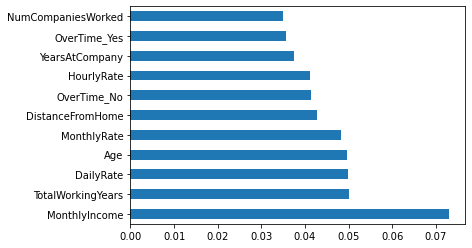

In [42]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(11).plot(kind='barh')

In [43]:
y_num_comp = df['YearsSinceLastPromotion']
X_num_comp = df.drop(['YearsSinceLastPromotion', 'Attrition'], axis=1)

In [44]:
X_num_comp_dummies = pd.get_dummies(X_num_comp)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_num_comp_dummies, 
                                                    y_num_comp, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [46]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_values = clf.predict(X_test)

In [48]:
importances = list(zip(clf.feature_importances_, X_train.columns))
importances.sort(reverse=True)

In [49]:
importances

[(0.09965232046089045, 'YearsAtCompany'),
 (0.06773617489292992, 'YearsInCurrentRole'),
 (0.05624357362367174, 'YearsWithCurrManager'),
 (0.055755773111297355, 'MonthlyIncome'),
 (0.052948694169828975, 'DailyRate'),
 (0.04940604047166969, 'MonthlyRate'),
 (0.04767182027317178, 'TotalWorkingYears'),
 (0.04659835393942799, 'HourlyRate'),
 (0.045065836179701224, 'Age'),
 (0.03984827979166164, 'DistanceFromHome'),
 (0.03647976882488107, 'PercentSalaryHike'),
 (0.028728453726432575, 'NumCompaniesWorked'),
 (0.027064022225587014, 'TrainingTimesLastYear'),
 (0.023164811463975473, 'Education'),
 (0.022567889094506913, 'JobSatisfaction'),
 (0.02188256453460075, 'EnvironmentSatisfaction'),
 (0.02149232828386175, 'RelationshipSatisfaction'),
 (0.01896106101730442, 'JobInvolvement'),
 (0.018494496569825228, 'StockOptionLevel'),
 (0.01700662215229206, 'WorkLifeBalance'),
 (0.01644493453877719, 'JobLevel'),
 (0.010426626486496402, 'MaritalStatus_Married'),
 (0.010419183158602217, 'BusinessTravel_Tra

In [50]:
df.sort_values(['MonthlyIncome'])['MonthlyIncome']

513      1009
727      1051
764      1052
1338     1081
1365     1091
        ...  
568     19859
165     19926
851     19943
746     19973
190     19999
Name: MonthlyIncome, Length: 1470, dtype: int64

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


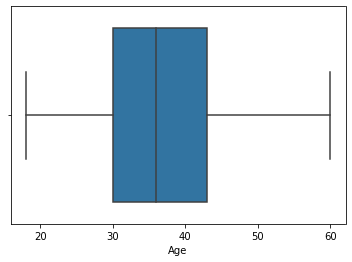

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

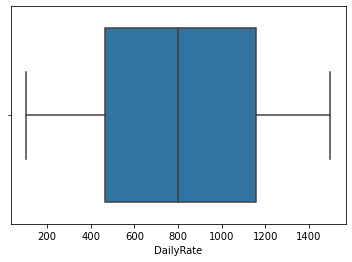

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


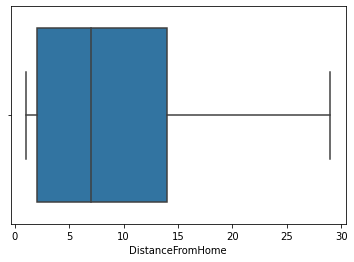

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


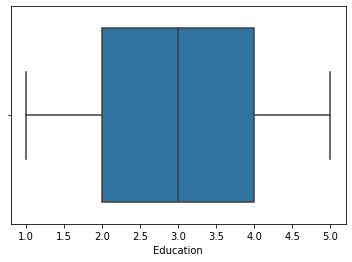

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


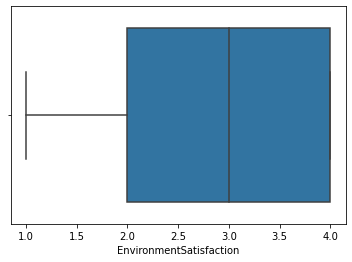

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


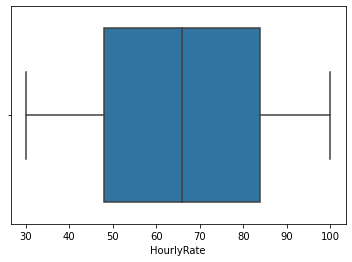

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


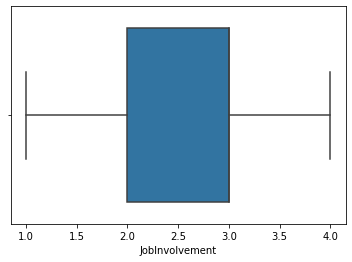

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


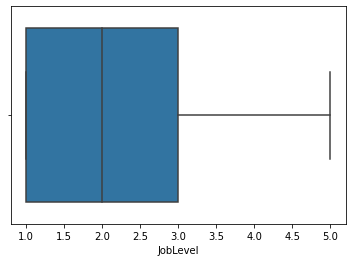

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


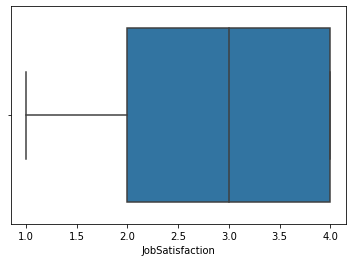

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


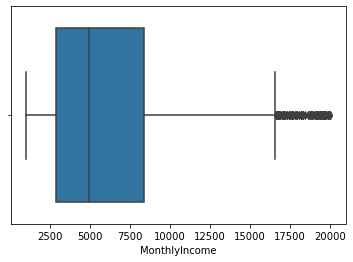

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


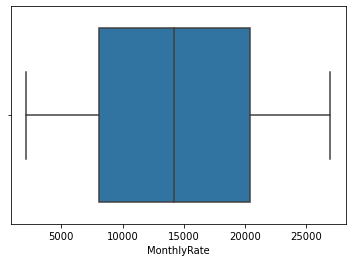

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


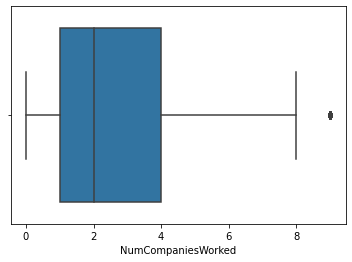

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


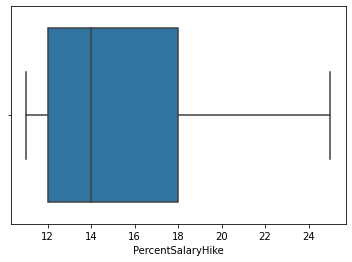

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


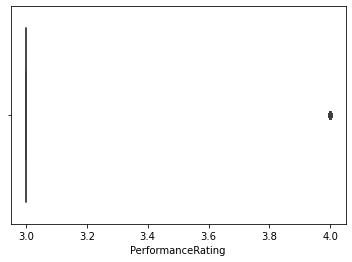

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


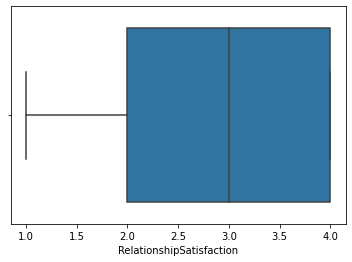

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


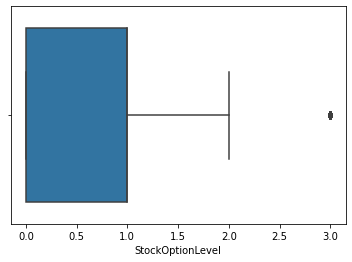

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


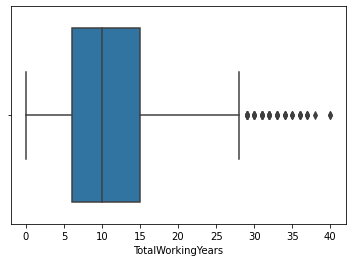

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


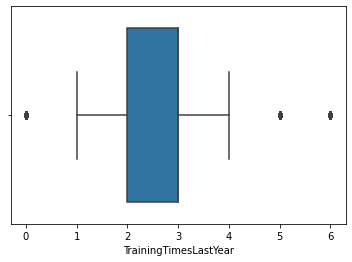

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


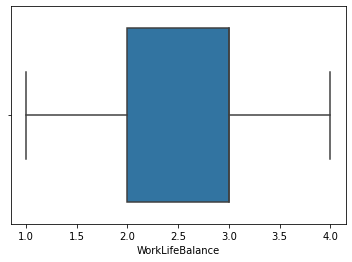

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


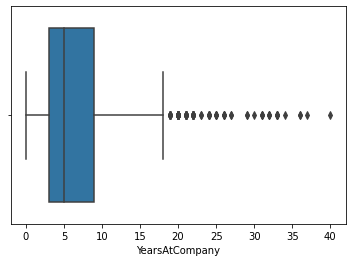

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


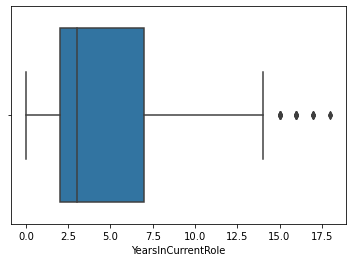

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


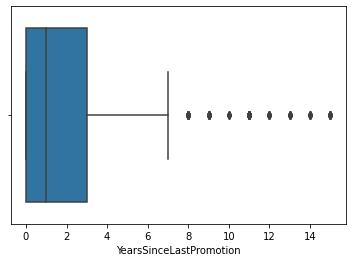

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


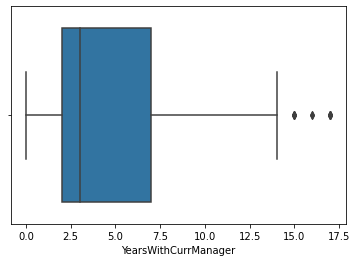

In [51]:
for column in df.columns:
    try:
        sns.boxplot(df[column])
        plt.show()
    except:
        pass

In [52]:
numerical = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', \
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', \
            'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', \
            'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', \
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)

In [54]:
df_normalized = df.copy()

In [55]:
df_normalized[numerical] = scaler.fit_transform(df_normalized[numerical])

In [56]:
df_normalized.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,Yes,Travel_Rarely,0.715820,Sales,0.000000,0.25,Life Sciences,0.333333,Female,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,No,Travel_Frequently,0.126700,Research & Development,0.250000,0.00,Life Sciences,0.666667,Male,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,Yes,Travel_Rarely,0.909807,Research & Development,0.035714,0.25,Other,1.000000,Male,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,No,Travel_Frequently,0.923407,Research & Development,0.071429,0.75,Life Sciences,1.000000,Female,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,No,Travel_Rarely,0.350036,Research & Development,0.035714,0.00,Medical,0.000000,Male,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [57]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [58]:
df_std = df.copy()

In [59]:
df_std[numerical] = std_scaler.fit_transform(df_std[numerical])

In [60]:
df_std.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,Yes,Travel_Rarely,0.742527,Sales,-1.010909,-0.891688,Life Sciences,-0.660531,Female,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,No,Travel_Frequently,-1.297775,Research & Development,-0.147150,-1.868426,Life Sciences,0.254625,Male,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,Yes,Travel_Rarely,1.414363,Research & Development,-0.887515,-0.891688,Other,1.169781,Male,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,No,Travel_Frequently,1.461466,Research & Development,-0.764121,1.061787,Life Sciences,1.169781,Female,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,No,Travel_Rarely,-0.524295,Research & Development,-0.887515,-1.868426,Medical,-1.575686,Male,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [61]:
from sklearn.metrics import accuracy_score, fbeta_score
from time import time
def train_predict(learner, X_train, y_train, X_test, y_test): 

    
    results = {}
    imp = {}
    
    start = time() 
    learner = learner.fit(X_train, y_train)
    end = time() 
    
    
    results['train_time'] = end - start
        
    
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() 
    
    
    results['pred_time'] = end - start
            
    
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=1, pos_label='Yes')
        
    
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=1, pos_label='Yes')
    
    
    #imp[learner.__class__.__name__] = list(zip(learner.feature_importances_, X_train.columns))
    
    print("{} trained.".format(learner.__class__.__name__))
        
    
    return results

In [62]:
X_normalized = df_normalized.drop('Attrition', axis=1)
X_normalized = pd.get_dummies(X_normalized)
y_normalized = df['Attrition']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, 
                                                    y_normalized, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [64]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



clf_A = RandomForestClassifier(random_state=42)
clf_B = AdaBoostClassifier(random_state=42)
clf_C = GaussianNB()



results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name][0] = \
    train_predict(clf, X_train, y_train, X_test, y_test)
    
    
results = results

RandomForestClassifier trained.
AdaBoostClassifier trained.
GaussianNB trained.


In [65]:
for i, ii in results.items():
    print(i, ii)
    print('')

RandomForestClassifier {0: {'train_time': 0.43639421463012695, 'pred_time': 0.06248736381530762, 'acc_train': 1.0, 'acc_test': 0.8775510204081632, 'f_train': 1.0, 'f_test': 0.21739130434782608}}

AdaBoostClassifier {0: {'train_time': 0.30356550216674805, 'pred_time': 0.055394649505615234, 'acc_train': 0.9132653061224489, 'acc_test': 0.8639455782312925, 'f_train': 0.6927710843373494, 'f_test': 0.3939393939393939}}

GaussianNB {0: {'train_time': 0.0, 'pred_time': 0.015552997589111328, 'acc_train': 0.6879251700680272, 'acc_test': 0.6938775510204082, 'f_train': 0.4610866372980911, 'f_test': 0.34782608695652173}}



In [66]:
X_std = df_std.drop('Attrition', axis=1)
X_std = pd.get_dummies(X_std)
y_std = df['Attrition']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_std, 
                                                    y_std, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [68]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clf_A = RandomForestClassifier(random_state=42)
clf_B = AdaBoostClassifier(random_state=42)
clf_C = GaussianNB()


results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name][0] = \
    train_predict(clf, X_train, y_train, X_test, y_test)
    
    
results_std = results

RandomForestClassifier trained.
AdaBoostClassifier trained.
GaussianNB trained.


In [69]:
for i, ii in results_std.items():
    print(i, ii)
    print('')

RandomForestClassifier {0: {'train_time': 0.43381285667419434, 'pred_time': 0.06249403953552246, 'acc_train': 1.0, 'acc_test': 0.8775510204081632, 'f_train': 1.0, 'f_test': 0.21739130434782608}}

AdaBoostClassifier {0: {'train_time': 0.3130488395690918, 'pred_time': 0.057057857513427734, 'acc_train': 0.9132653061224489, 'acc_test': 0.8673469387755102, 'f_train': 0.6927710843373494, 'f_test': 0.4}}

GaussianNB {0: {'train_time': 0.0, 'pred_time': 0.0, 'acc_train': 0.6879251700680272, 'acc_test': 0.6938775510204082, 'f_train': 0.4610866372980911, 'f_test': 0.34782608695652173}}



## Creación de columnas con simplificación por rangos para columnas con rangos de valores grandes

### HourlyRate

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64


C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


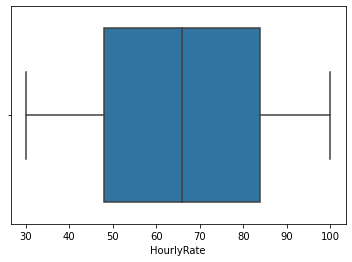

In [70]:
sns.boxplot(df['HourlyRate'])
print(df['HourlyRate'].describe())

<AxesSubplot:>

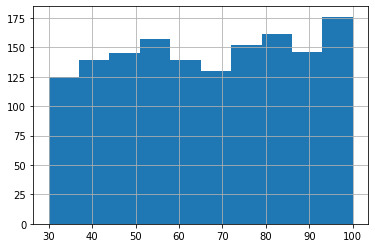

In [71]:
df['HourlyRate'].hist()

Creación de los filtros, los outputs y la columna

In [72]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    df['HourlyRate'] <= df['HourlyRate'].quantile(0.25),
    df['HourlyRate'] <= df['HourlyRate'].quantile(0.5),
    df['HourlyRate'] <= df['HourlyRate'].quantile(0.75),
    df['HourlyRate'] <= df['HourlyRate'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
df['HourlyRate_cat'] = pd.Series(res)

pd.to_numeric(df['HourlyRate_cat'])

# Visualización 
df[['HourlyRate', 'HourlyRate_cat']]

,HourlyRate,HourlyRate_cat
0,94,4
1,61,2
2,92,4
3,56,2
4,40,1
...,...,...
1465,41,1
1466,42,1
1467,87,4
1468,63,2


Comprobación

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HourlyRate_cat'>

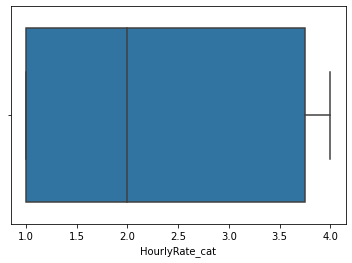

In [73]:
sns.boxplot(df['HourlyRate_cat'])

<AxesSubplot:>

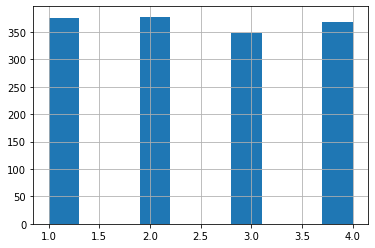

In [74]:
df['HourlyRate_cat'].hist()

### DailyRate

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64


C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


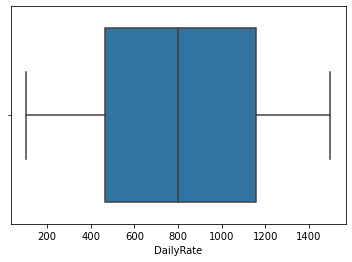

In [75]:
sns.boxplot(df['DailyRate'])
print(df['DailyRate'].describe())

<AxesSubplot:>

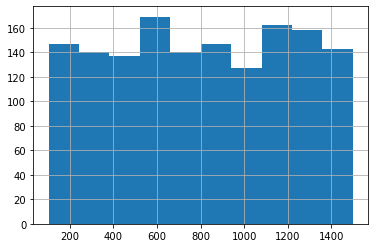

In [76]:
df['DailyRate'].hist()

Creación de los filtros, los outputs y la columna

In [77]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    df['DailyRate'] <= df['DailyRate'].quantile(0.25),
    df['DailyRate'] <= df['DailyRate'].quantile(0.5),
    df['DailyRate'] <= df['DailyRate'].quantile(0.75),
    df['DailyRate'] <= df['DailyRate'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
df['DailyRate_cat'] = pd.Series(res)

pd.to_numeric(df['DailyRate_cat'])

# Visualización 
df[['DailyRate', 'DailyRate_cat']]

,DailyRate,DailyRate_cat
0,1102,3
1,279,1
2,1373,4
3,1392,4
4,591,2
...,...,...
1465,884,3
1466,613,2
1467,155,1
1468,1023,3


Comprobación

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DailyRate_cat'>

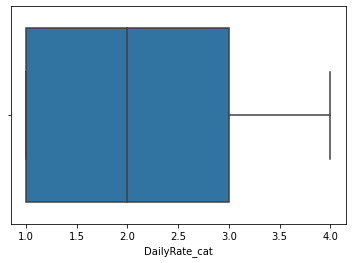

In [78]:
sns.boxplot(df['DailyRate_cat'])

<AxesSubplot:>

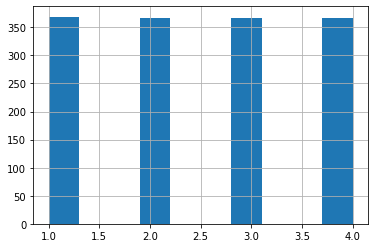

In [79]:
df['DailyRate_cat'].hist()

### MonthlyRate

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64


C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


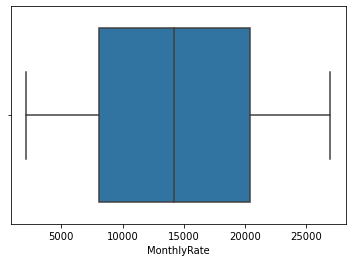

In [80]:
sns.boxplot(df['MonthlyRate'])
print(df['MonthlyRate'].describe())

<AxesSubplot:>

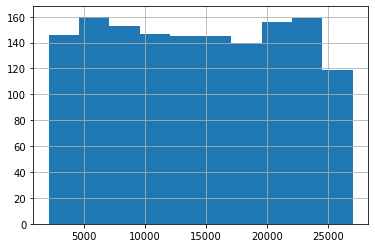

In [81]:
df['MonthlyRate'].hist()

Creación de los filtros, los outputs y la columna

In [82]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    df['MonthlyRate'] <= df['MonthlyRate'].quantile(0.25),
    df['MonthlyRate'] <= df['MonthlyRate'].quantile(0.5),
    df['MonthlyRate'] <= df['MonthlyRate'].quantile(0.75),
    df['MonthlyRate'] <= df['MonthlyRate'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
df['MonthlyRate_cat'] = pd.Series(res)

pd.to_numeric(df['MonthlyRate_cat'])

# Visualización 
df[['MonthlyRate', 'MonthlyRate_cat']]

,MonthlyRate,MonthlyRate_cat
0,19479,3
1,24907,4
2,2396,1
3,23159,4
4,16632,3
...,...,...
1465,12290,2
1466,21457,4
1467,5174,1
1468,13243,2


Comprobación

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyRate_cat'>

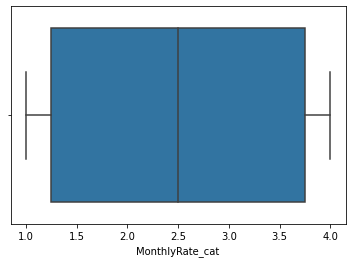

In [83]:
sns.boxplot(df['MonthlyRate_cat'])

<AxesSubplot:>

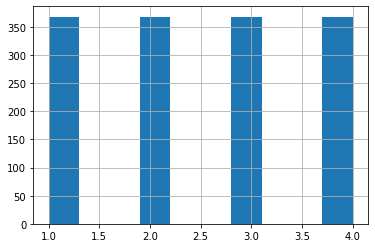

In [84]:
df['MonthlyRate_cat'].hist()

### MonthlyIncome

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


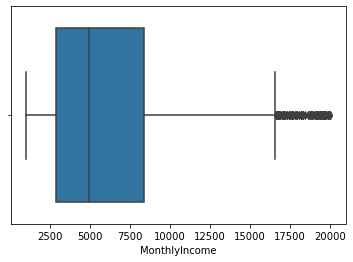

In [85]:
sns.boxplot(df['MonthlyIncome'])
print(df['MonthlyIncome'].describe())

<AxesSubplot:>

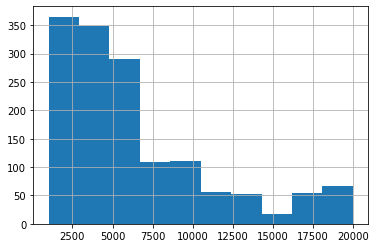

In [86]:
df['MonthlyIncome'].hist()

Creación de los filtros, los outputs y la columna

In [87]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    df['MonthlyIncome'] <= df['MonthlyIncome'].quantile(0.25),
    df['MonthlyIncome'] <= df['MonthlyIncome'].quantile(0.5),
    df['MonthlyIncome'] <= df['MonthlyIncome'].quantile(0.75),
    df['MonthlyIncome'] <= df['MonthlyIncome'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
df['MonthlyIncome_cat'] = pd.Series(res)

pd.to_numeric(df['MonthlyIncome_cat'])

# Visualización 
df[['MonthlyIncome', 'MonthlyIncome_cat']]

,MonthlyIncome,MonthlyIncome_cat
0,5993,3
1,5130,3
2,2090,1
3,2909,1
4,3468,2
...,...,...
1465,2571,1
1466,9991,4
1467,6142,3
1468,5390,3


Comprobación

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome_cat'>

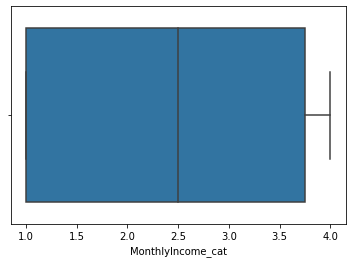

In [88]:
sns.boxplot(df['MonthlyIncome_cat'])

<AxesSubplot:>

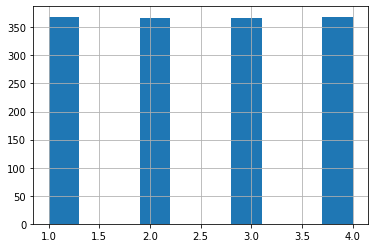

In [89]:
df['MonthlyIncome_cat'].hist()

### TotalWorkingYears


count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


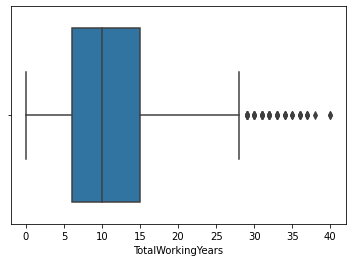

In [90]:
sns.boxplot(df['TotalWorkingYears'])
print(df['TotalWorkingYears'].describe())

<AxesSubplot:>

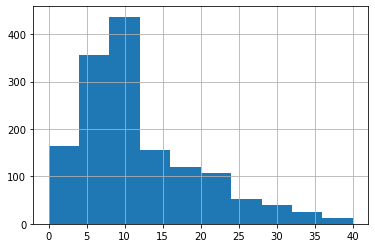

In [91]:
df['TotalWorkingYears'].hist()

Creación de los filtros, los outputs y la columna

In [92]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    df['TotalWorkingYears'] <= df['TotalWorkingYears'].quantile(0.25),
    df['TotalWorkingYears'] <= df['TotalWorkingYears'].quantile(0.5),
    df['TotalWorkingYears'] <= df['TotalWorkingYears'].quantile(0.75),
    df['TotalWorkingYears'] <= df['TotalWorkingYears'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
df['TotalWorkingYears_cat'] = pd.Series(res)

pd.to_numeric(df['TotalWorkingYears_cat'])

# Visualización 
df[['TotalWorkingYears', 'TotalWorkingYears_cat']]

,TotalWorkingYears,TotalWorkingYears_cat
0,8,2
1,10,2
2,7,2
3,8,2
4,6,1
...,...,...
1465,17,4
1466,9,2
1467,6,1
1468,17,4


Comprobación

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears_cat'>

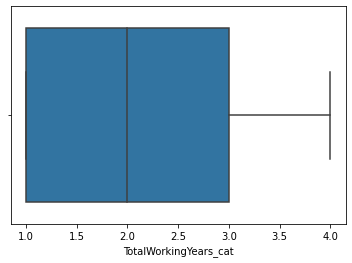

In [93]:
sns.boxplot(df['TotalWorkingYears_cat'])

<AxesSubplot:>

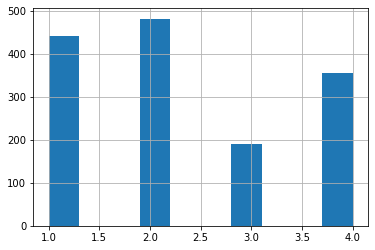

In [94]:
df['TotalWorkingYears_cat'].hist()

### YearsAtCompany

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64


C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


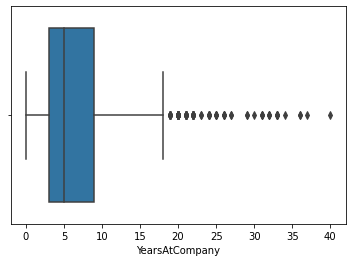

In [95]:
sns.boxplot(df['YearsAtCompany'])
print(df['YearsAtCompany'].describe())

<AxesSubplot:>

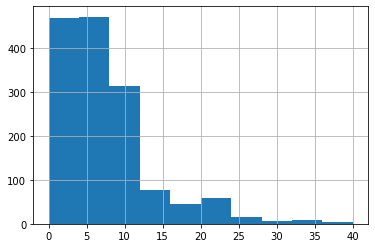

In [96]:
df['YearsAtCompany'].hist()

Creación de los filtros, los outputs y la columna

In [97]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    df['YearsAtCompany'] <= df['YearsAtCompany'].quantile(0.25),
    df['YearsAtCompany'] <= df['YearsAtCompany'].quantile(0.5),
    df['YearsAtCompany'] <= df['YearsAtCompany'].quantile(0.75),
    df['YearsAtCompany'] <= df['YearsAtCompany'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
df['YearsAtCompany_cat'] = pd.Series(res)

pd.to_numeric(df['YearsAtCompany_cat'])

# Visualización 
df[['YearsAtCompany', 'YearsAtCompany_cat']]

,YearsAtCompany,YearsAtCompany_cat
0,6,3
1,10,4
2,0,1
3,8,3
4,2,1
...,...,...
1465,5,2
1466,7,3
1467,6,3
1468,9,3


Comprobación

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany_cat'>

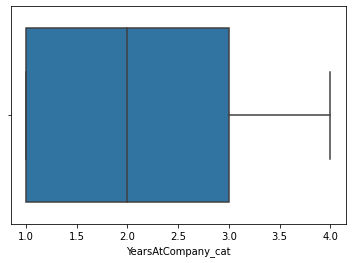

In [98]:
sns.boxplot(df['YearsAtCompany_cat'])

<AxesSubplot:>

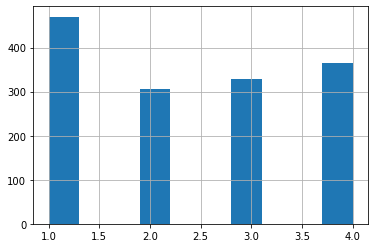

In [99]:
df['YearsAtCompany_cat'].hist()

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='YearsAtCompany'>

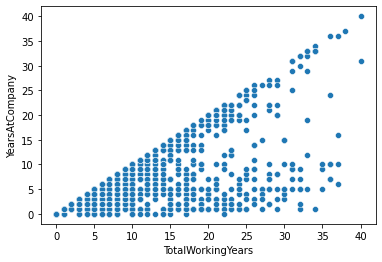

In [100]:
sns.scatterplot(df['TotalWorkingYears'], df['YearsAtCompany'])

## Extracción de lineas con MonthlyIncome Outlier

<AxesSubplot:>

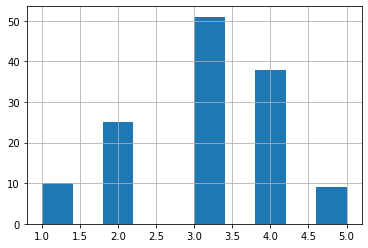

In [101]:
incomeOutliers = df[df['MonthlyIncome'] > 15000]
# incomeOutliers['Attrition'].value_counts()
incomeOutliers['Education'].hist()

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='TotalWorkingYears'>

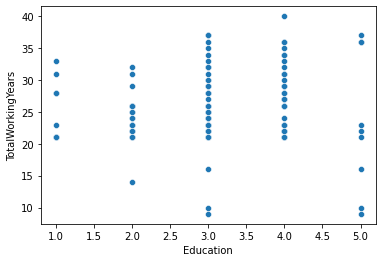

In [102]:
sns.scatterplot(incomeOutliers['Education'], incomeOutliers['TotalWorkingYears'])

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='YearsAtCompany'>

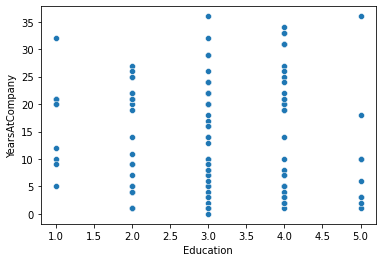

In [103]:
sns.scatterplot(incomeOutliers['Education'], incomeOutliers['YearsAtCompany'])

In [104]:
columns_list = incomeOutliers.columns.values.tolist()
for column in columns_list:
    print(column)
    print(incomeOutliers[column].unique())
    print('\n')

Age
[53 46 41 50 59 54 43 51 40 55 52 45 42 49 39 47 60 33 48 44 58 56 29 31
 34]


Attrition
['No' 'Yes']


BusinessTravel
['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']


DailyRate
[1219 1282  705 1360  989 1420 1115  142  394  684  857 1452  692  699
 1195  532  854 1034  771  252 1416  488  452  797 1070  636  334  117
  672 1482  810 1311  821 1218 1490  422 1398 1099 1009 1117  922 1276
 1245 1246  782 1236 1315  427  314  621  725  570  691  202  286  589
 1318  881 1053  722 1126  840  265  247  266 1234 1464  430  444  469
 1262  406 1308  718 1223 1402 1421 1450  685  920 1098  715  694 1449
  168  237 1199  364  412 1322  495  282  206 1147  971 1055  182  359
  447  829 1050  136  228  898  264 1059  563 1313 1176  365  301  584
 1291 1225  809 1005  611  478  734  350 1216  823 1224 1137  605 1064
  189  105  300]


Department
['Sales' 'Research & Development' 'Human Resources']


DistanceFromHome
[ 2  5 12  7  1 26  6 10 11  4 14 16  3 23 29 18  8 17  9 15 25 13 28 22

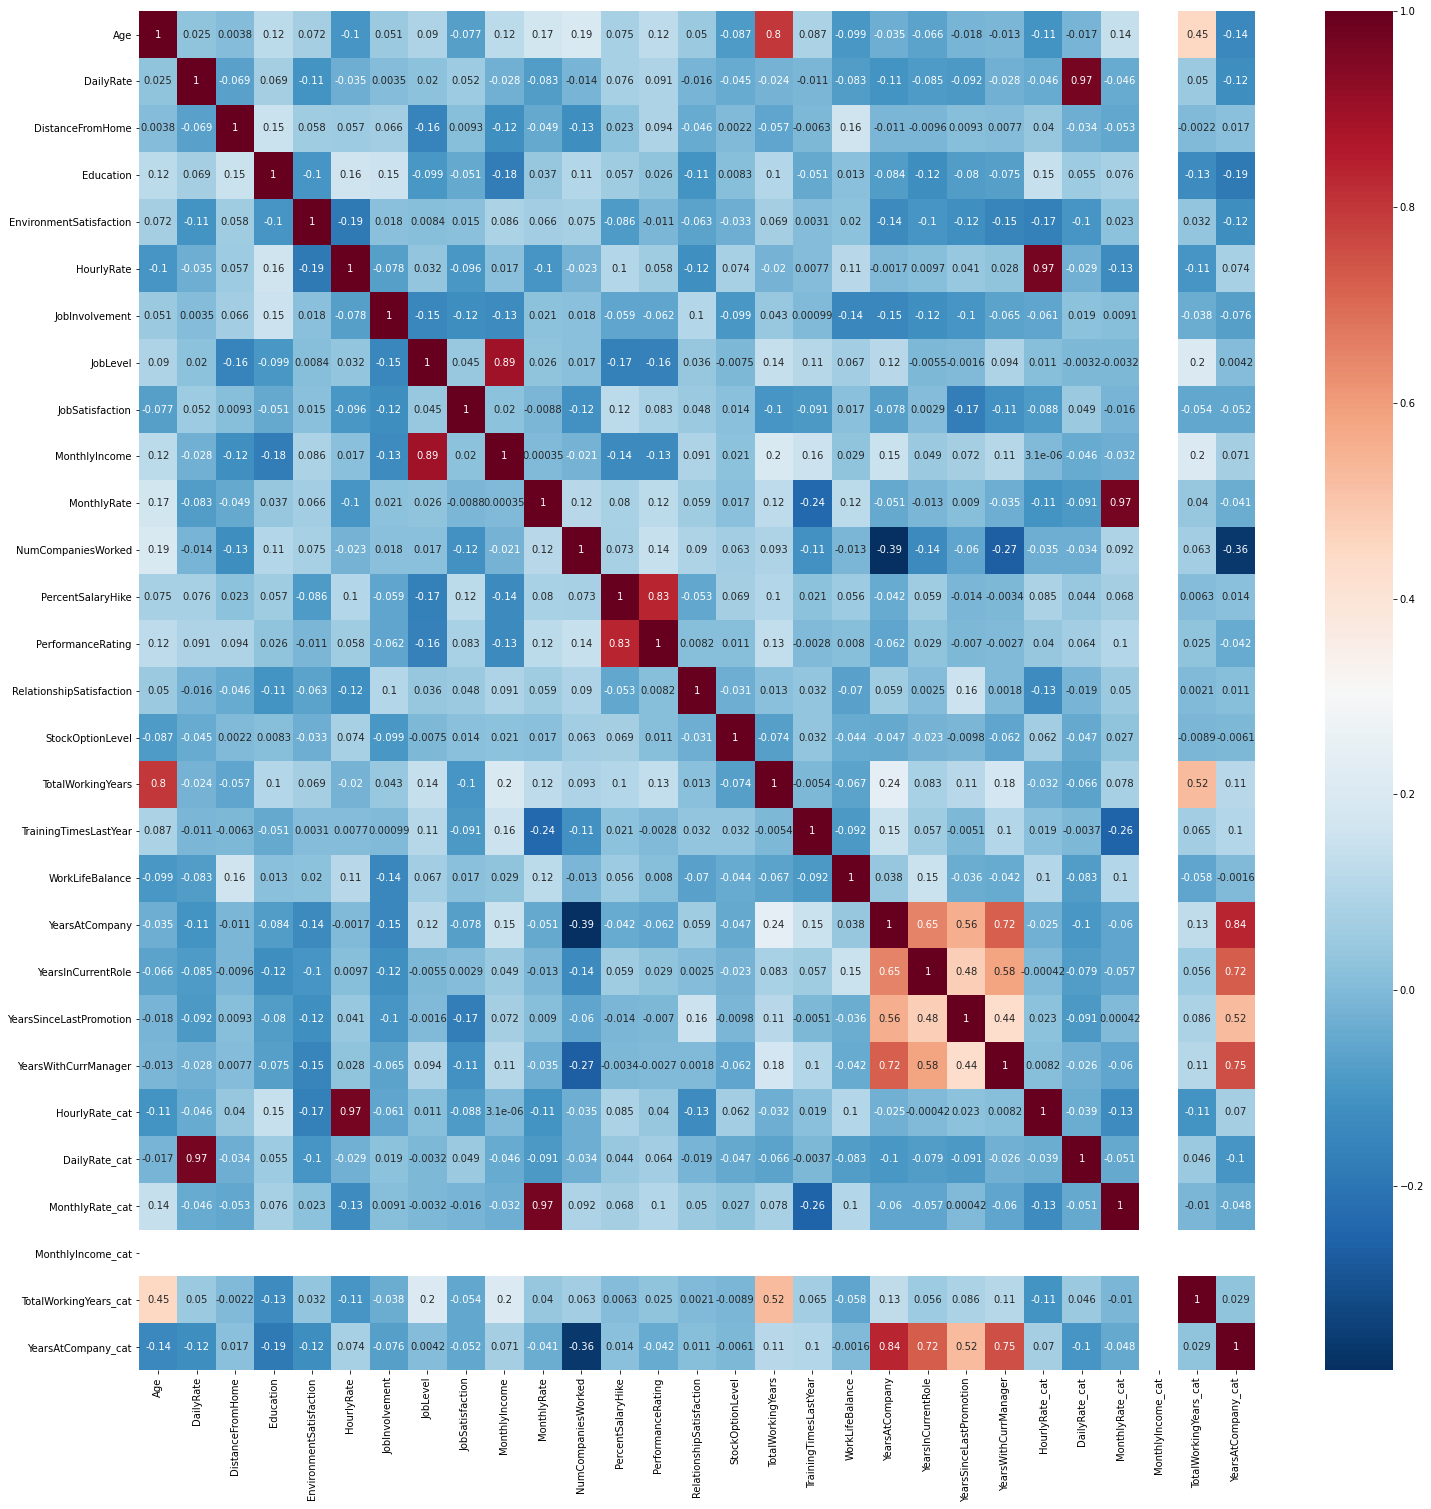

In [105]:
plt.figure(figsize=(25,25))
sns.heatmap(incomeOutliers.corr(), annot=True, cmap="RdBu_r")
plt.show()


C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

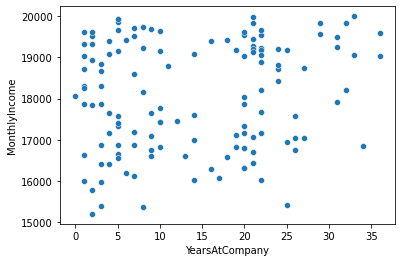

In [106]:
sns.scatterplot(incomeOutliers['YearsAtCompany'], incomeOutliers['MonthlyIncome'])

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

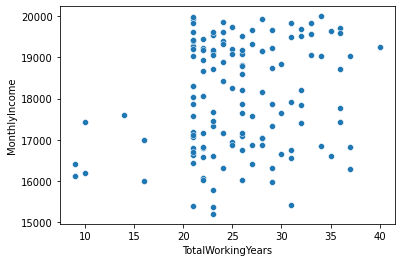

In [107]:
sns.scatterplot(incomeOutliers['TotalWorkingYears'], incomeOutliers['MonthlyIncome'])

## Estudio temporal

In [108]:
new_employees = df[df['YearsAtCompany'] == 1]

In [109]:
for column in new_employees.columns:
    print(new_employees[column].value_counts())

38    10
40     9
36     9
35     9
42     8
37     8
31     8
29     7
30     7
19     7
28     6
24     6
34     5
27     5
20     5
43     5
32     5
26     5
41     4
21     4
58     4
48     3
39     3
22     3
45     3
33     3
25     2
51     2
50     2
44     2
59     2
55     2
23     2
57     1
46     1
54     1
49     1
47     1
60     1
Name: Age, dtype: int64
No     112
Yes     59
Name: Attrition, dtype: int64
Travel_Rarely        128
Travel_Frequently     25
Non-Travel            18
Name: BusinessTravel, dtype: int64
265    2
504    2
350    2
464    2
660    2
      ..
459    1
603    1
605    1
804    1
359    1
Name: DailyRate, Length: 161, dtype: int64
Research & Development    122
Sales                      44
Human Resources             5
Name: Department, dtype: int64
2     27
1     21
10    13
9     12
7     11
3     11
24     8
5      6
6      6
8      6
4      6
21     4
12     4
25     4
16     4
18     4
26     3
29     3
19     3
17     3
11     3
20     2
22

## Ahora vamos a ampliar el dataset

In [110]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_dummies, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1470, 30)
Shape of X after SMOTE: (2466, 51)

Balance of positive and negative classes (%):


No     50.0
Yes    50.0
Name: Attrition, dtype: float64

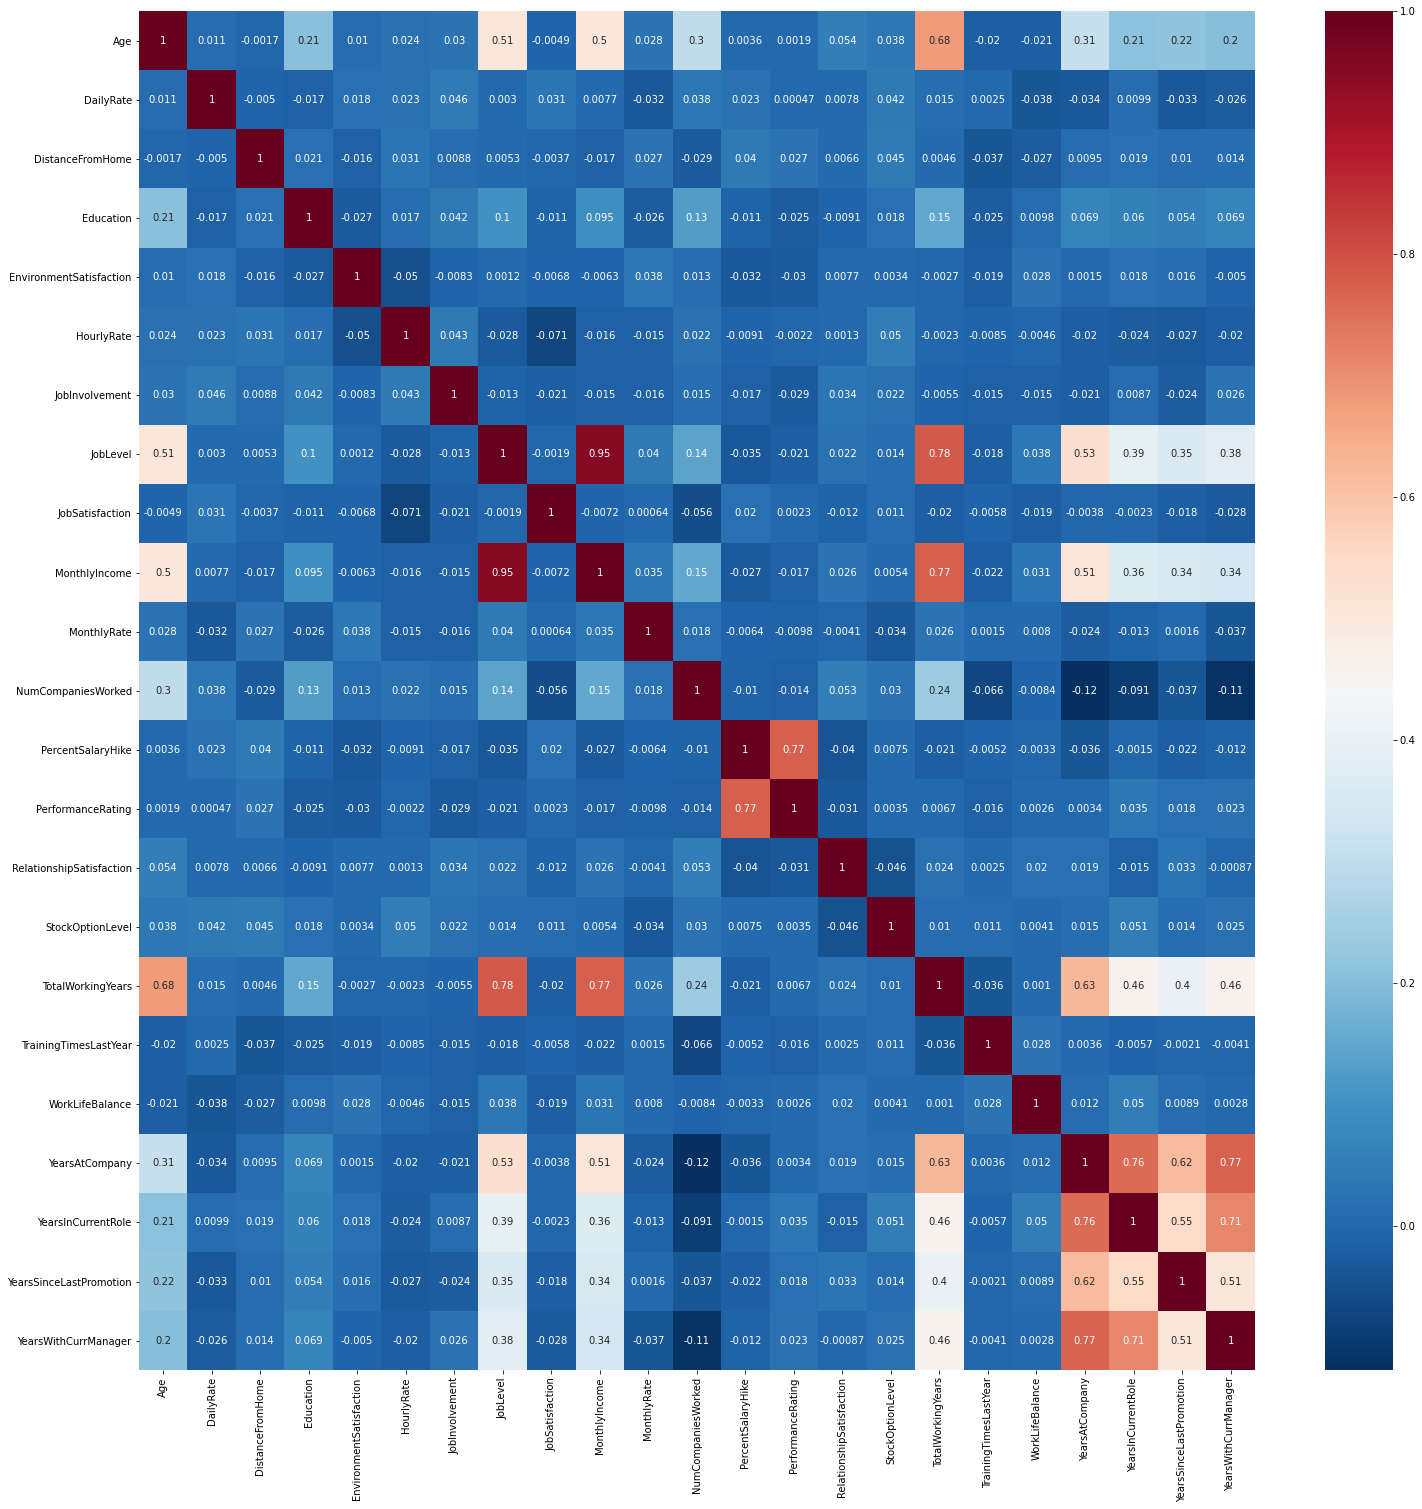

In [113]:
corrMatrix2 = X_sm.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrMatrix, annot=True, cmap="RdBu_r")
plt.show()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, 
                                                    y_sm, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [115]:
clf.fit(X_train, y_train)

GaussianNB()

In [116]:
y_values = clf.predict(X_test)

In [117]:
importances = list(zip(clf.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [ ]:
plt.bar(y_sm, X_sm['OverTime_No'])
plt.show()

In [ ]:
plt.hist(y_sm)
plt.hist(X_sm['OverTime_No'])

## Creación de columnas con simplificación por rangos para columnas con rangos de valores grandes

### HourlyRate

In [ ]:
sns.boxplot(X_sm['HourlyRate'])
print(X_sm['HourlyRate'].describe())

In [ ]:
X_sm['HourlyRate'].hist()

Creación de los filtros, los outputs y la columna

In [ ]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    X_sm['HourlyRate'] <= X_sm['HourlyRate'].quantile(0.25),
    X_sm['HourlyRate'] <= X_sm['HourlyRate'].quantile(0.5),
    X_sm['HourlyRate'] <= X_sm['HourlyRate'].quantile(0.75),
    X_sm['HourlyRate'] <= X_sm['HourlyRate'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
X_sm['HourlyRate_cat'] = pd.Series(res)

pd.to_numeric(X_sm['HourlyRate_cat'])

# Visualización 
X_sm[['HourlyRate', 'HourlyRate_cat']]

Comprobación

In [ ]:
sns.boxplot(X_sm['HourlyRate_cat'])

In [ ]:
X_sm['HourlyRate_cat'].hist()

### DailyRate

In [ ]:
sns.boxplot(X_sm['DailyRate'])
print(X_sm['DailyRate'].describe())

In [ ]:
X_sm['DailyRate'].hist()

Creación de los filtros, los outputs y la columna

In [ ]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    X_sm['DailyRate'] <= X_sm['DailyRate'].quantile(0.25),
    X_sm['DailyRate'] <= X_sm['DailyRate'].quantile(0.5),
    X_sm['DailyRate'] <= X_sm['DailyRate'].quantile(0.75),
    X_sm['DailyRate'] <= X_sm['DailyRate'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
X_sm['DailyRate_cat'] = pd.Series(res)

pd.to_numeric(X_sm['DailyRate_cat'])

# Visualización 
X_sm[['DailyRate', 'DailyRate_cat']]

Comprobación

In [ ]:
sns.boxplot(X_sm['DailyRate_cat'])

In [ ]:
X_sm['DailyRate_cat'].hist()

### MonthlyRate

In [ ]:
sns.boxplot(X_sm['MonthlyRate'])
print(X_sm['MonthlyRate'].describe())

In [ ]:
X_sm['MonthlyRate'].hist()

Creación de los filtros, los outputs y la columna

In [ ]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    X_sm['MonthlyRate'] <= X_sm['MonthlyRate'].quantile(0.25),
    X_sm['MonthlyRate'] <= X_sm['MonthlyRate'].quantile(0.5),
    X_sm['MonthlyRate'] <= X_sm['MonthlyRate'].quantile(0.75),
    X_sm['MonthlyRate'] <= X_sm['MonthlyRate'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
X_sm['MonthlyRate_cat'] = pd.Series(res)

pd.to_numeric(X_sm['MonthlyRate_cat'])

# Visualización 
X_sm[['MonthlyRate', 'MonthlyRate_cat']]

Comprobación

In [ ]:
sns.boxplot(X_sm['MonthlyRate_cat'])

In [ ]:
X_sm['MonthlyRate_cat'].hist()

### MonthlyIncome

In [ ]:
sns.boxplot(X_sm['MonthlyIncome'])
print(X_sm['MonthlyIncome'].describe())

In [ ]:
X_sm['MonthlyIncome'].hist()

Creación de los filtros, los outputs y la columna

In [ ]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    X_sm['MonthlyIncome'] <= X_sm['MonthlyIncome'].quantile(0.25),
    X_sm['MonthlyIncome'] <= X_sm['MonthlyIncome'].quantile(0.5),
    X_sm['MonthlyIncome'] <= X_sm['MonthlyIncome'].quantile(0.75),
    X_sm['MonthlyIncome'] <= X_sm['MonthlyIncome'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
X_sm['MonthlyIncome_cat'] = pd.Series(res)

pd.to_numeric(X_sm['MonthlyIncome_cat'])

# Visualización 
X_sm[['MonthlyIncome', 'MonthlyIncome_cat']]

Comprobación

In [ ]:
sns.boxplot(X_sm['MonthlyIncome_cat'])

In [ ]:
X_sm['MonthlyIncome_cat'].hist()

### TotalWorkingYears


In [ ]:
sns.boxplot(X_sm['TotalWorkingYears'])
print(X_sm['TotalWorkingYears'].describe())

In [ ]:
X_sm['TotalWorkingYears'].hist()

Creación de los filtros, los outputs y la columna

In [ ]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    X_sm['TotalWorkingYears'] <= X_sm['TotalWorkingYears'].quantile(0.25),
    X_sm['TotalWorkingYears'] <= X_sm['TotalWorkingYears'].quantile(0.5),
    X_sm['TotalWorkingYears'] <= X_sm['TotalWorkingYears'].quantile(0.75),
    X_sm['TotalWorkingYears'] <= X_sm['TotalWorkingYears'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
X_sm['TotalWorkingYears_cat'] = pd.Series(res)

pd.to_numeric(X_sm['TotalWorkingYears_cat'])

# Visualización 
X_sm[['TotalWorkingYears', 'TotalWorkingYears_cat']]

Comprobación

In [ ]:
sns.boxplot(X_sm['TotalWorkingYears_cat'])

In [ ]:
X_sm['TotalWorkingYears_cat'].hist()

### YearsAtCompany

In [ ]:
sns.boxplot(X_sm['YearsAtCompany'])
print(X_sm['YearsAtCompany'].describe())

In [ ]:
X_sm['YearsAtCompany'].hist()

Creación de los filtros, los outputs y la columna

In [ ]:
# Condiciones de evaluación de los datos
hourlyRate_conditions = [
    X_sm['YearsAtCompany'] <= X_sm['YearsAtCompany'].quantile(0.25),
    X_sm['YearsAtCompany'] <= X_sm['YearsAtCompany'].quantile(0.5),
    X_sm['YearsAtCompany'] <= X_sm['YearsAtCompany'].quantile(0.75),
    X_sm['YearsAtCompany'] <= X_sm['YearsAtCompany'].max()
] 

# Valores asignados en base a la evaluación
hourlyRate_outputs = [1, 2, 3, 4]

# Ejecución de la comparación
res = np.select(hourlyRate_conditions, hourlyRate_outputs, -1)

# Creación de la nueva columna
X_sm['YearsAtCompany_cat'] = pd.Series(res)

pd.to_numeric(X_sm['YearsAtCompany_cat'])

# Visualización 
X_sm[['YearsAtCompany', 'YearsAtCompany_cat']]

Comprobación

In [ ]:
sns.boxplot(X_sm['YearsAtCompany_cat'])

In [ ]:
X_sm['YearsAtCompany_cat'].hist()

In [ ]:
sns.scatterplot(X_sm['TotalWorkingYears'], X_sm['YearsAtCompany'])

## Extracción de lineas con MonthlyIncome Outlier

In [ ]:
incomeOutliers_sm = X_sm[X_sm['MonthlyIncome'] > 15000]
# incomeOutliers['Attrition'].value_counts()
incomeOutliers_sm['Education'].hist()

In [ ]:
sns.scatterplot(incomeOutliers_sm['Education'],incomeOutliers_sm['TotalWorkingYears'])

In [ ]:
sns.scatterplot(incomeOutliers_sm['Education'], incomeOutliers_sm['YearsAtCompany'])

In [ ]:
columns_list = incomeOutliers_sm.columns.values.tolist()
for column in columns_list:
    print(column)
    print(incomeOutliers_sm[column].unique())
    print('\n')

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(incomeOutliers_sm.corr(), annot=True, cmap="RdBu_r")
plt.show()


In [ ]:
sns.scatterplot(incomeOutliers_sm['YearsAtCompany'], incomeOutliers_sm['MonthlyIncome'])

In [ ]:
sns.scatterplot(incomeOutliers_sm['TotalWorkingYears'], incomeOutliers_sm['MonthlyIncome'])

## Estudio sobre la influencia de variables (Attrition and Low Attrition)

In [119]:
X_dummies.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou